In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [166]:
df=pd.read_csv("/content/kidney_disease.csv")

In [167]:
df.head(2)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [169]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

# Removing columns

In [170]:
df.drop(columns=['id','sg','al','pc','pcc','ba','wc','cad','appet','pe','ane','pcv','htn','sc'],inplace=True)

In [171]:
df.head(2)

,age,bp,su,rbc,bgr,bu,sod,pot,hemo,rc,dm,classification
0,48.0,80.0,0.0,NaN,121.0,36.0,NaN,NaN,15.4,5.2,yes,ckd
1,7.0,50.0,0.0,NaN,NaN,18.0,NaN,NaN,11.3,NaN,no,ckd


# Handling with null values

In [172]:
df['age']=df['age'].fillna(df['age'].mean())
df['bp']=df['bp'].fillna(df['bp'].mean())
df['su']=df['su'].fillna(df['su'].mean())
df['rbc']=df['rbc'].fillna(df['rbc'].mode()[0])
df['bgr']=df['bgr'].fillna(df['bgr'].mean())
df['bu']=df['bu'].fillna(df['bu'].mean())
df['sod']=df['sod'].fillna(df['sod'].mean())
df['pot']=df['pot'].fillna(df['pot'].mean())
df['hemo']=df['hemo'].fillna(df['hemo'].mean())
df['rc']=df['rc'].fillna(df['rc'].mode()[0])
df['dm']=df['dm'].fillna(df['dm'].mode()[0])

In [173]:
df.isnull().sum()

age               0
bp                0
su                0
rbc               0
bgr               0
bu                0
sod               0
pot               0
hemo              0
rc                0
dm                0
classification    0
dtype: int64

In [174]:
df.describe()

,age,bp,su,bgr,bu,sod,pot,hemo
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,0.450142,148.036517,57.425722,137.528754,4.627244,12.526437
std,16.974966,13.476298,1.029487,74.782634,49.285887,9.204273,2.819783,2.716171
min,2.000000,50.000000,0.000000,22.000000,1.500000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,0.000000,101.000000,27.000000,135.000000,4.000000,10.875000
50%,54.000000,78.234536,0.000000,126.000000,44.000000,137.528754,4.627244,12.526437
75%,64.000000,80.000000,0.450142,150.000000,61.750000,141.000000,4.800000,14.625000
max,90.000000,180.000000,5.000000,490.000000,391.000000,163.000000,47.000000,17.800000


# Label Encoding

In [175]:
df.head(2)

,age,bp,su,rbc,bgr,bu,sod,pot,hemo,rc,dm,classification
0,48.0,80.0,0.0,normal,121.000000,36.0,137.528754,4.627244,15.4,5.2,yes,ckd
1,7.0,50.0,0.0,normal,148.036517,18.0,137.528754,4.627244,11.3,5.2,no,ckd


In [176]:
le=LabelEncoder()

In [177]:
df['rbc']=le.fit_transform(df['rbc'])
df['dm']=le.fit_transform(df['dm'])
df['classification']=le.fit_transform(df['classification'])
df['rc']=le.fit_transform(df['rc'])

In [178]:
# Check the label encoding
print("Label encoding mapping for classification:")
print(dict(zip(le.classes_, le.transform(le.classes_))))

Label encoding mapping for classification:
{'\t?': 0, '2.1': 1, '2.3': 2, '2.4': 3, '2.5': 4, '2.6': 5, '2.7': 6, '2.8': 7, '2.9': 8, '3': 9, '3.0': 10, '3.1': 11, '3.2': 12, '3.3': 13, '3.4': 14, '3.5': 15, '3.6': 16, '3.7': 17, '3.8': 18, '3.9': 19, '4': 20, '4.0': 21, '4.1': 22, '4.2': 23, '4.3': 24, '4.4': 25, '4.5': 26, '4.6': 27, '4.7': 28, '4.8': 29, '4.9': 30, '5': 31, '5.0': 32, '5.1': 33, '5.2': 34, '5.3': 35, '5.4': 36, '5.5': 37, '5.6': 38, '5.7': 39, '5.8': 40, '5.9': 41, '6.0': 42, '6.1': 43, '6.2': 44, '6.3': 45, '6.4': 46, '6.5': 47, '8.0': 48}


In [179]:
df.head(2)

,age,bp,su,rbc,bgr,bu,sod,pot,hemo,rc,dm,classification
0,48.0,80.0,0.0,1,121.000000,36.0,137.528754,4.627244,15.4,34,4,0
1,7.0,50.0,0.0,1,148.036517,18.0,137.528754,4.627244,11.3,34,3,0


#EDA

# Univariate

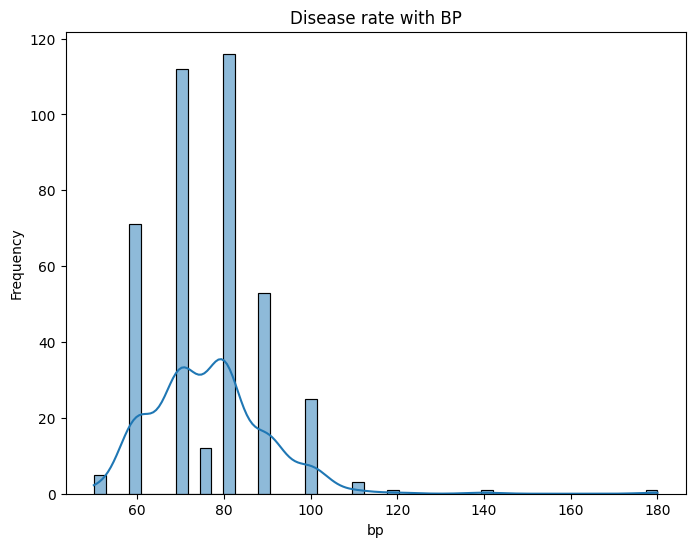

In [180]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bp'], kde=True)
plt.title(f'Disease rate with BP')
plt.xlabel('bp')
plt.ylabel('Frequency')
plt.show()

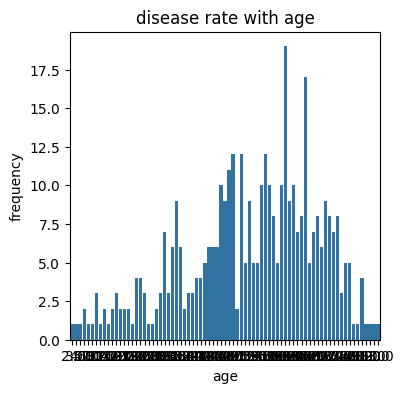

In [181]:
plt.figure(figsize=(4,4))
sns.countplot(x='age',data=df)
plt.title(f'disease rate with age')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

#Bivariate

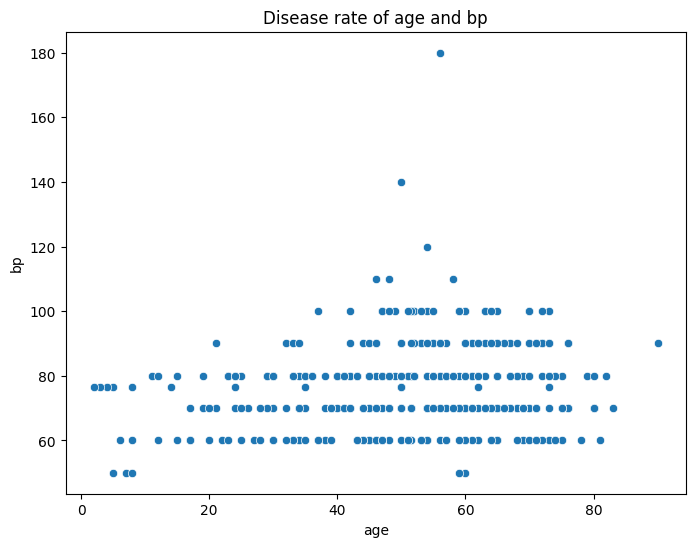

In [182]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='bp',data=df)
plt.title(f'Disease rate of age and bp')
plt.xlabel("age")
plt.ylabel("bp")
plt.show()

# multivariate

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   su              400 non-null    float64
 3   rbc             400 non-null    int64  
 4   bgr             400 non-null    float64
 5   bu              400 non-null    float64
 6   sod             400 non-null    float64
 7   pot             400 non-null    float64
 8   hemo            400 non-null    float64
 9   rc              400 non-null    int64  
 10  dm              400 non-null    int64  
 11  classification  400 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 37.6 KB


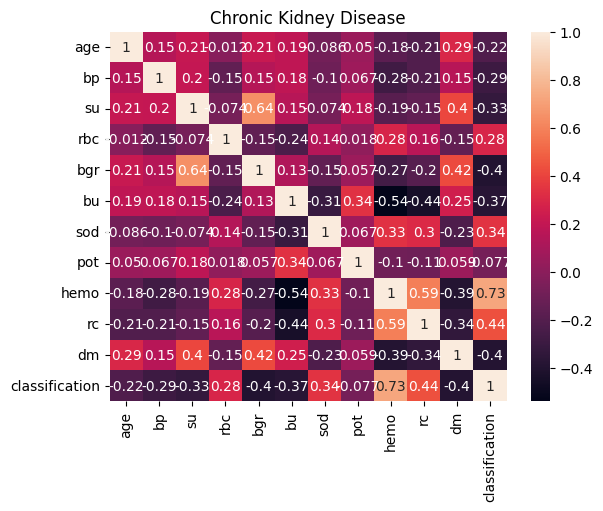

In [184]:
sns.heatmap(df.corr(),annot=True)
plt.title("Chronic Kidney Disease")
plt.show()

#Outliers

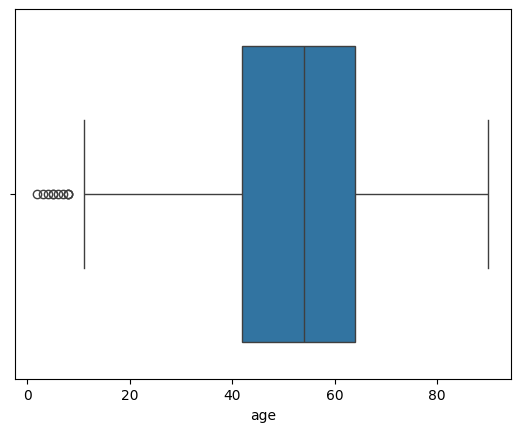

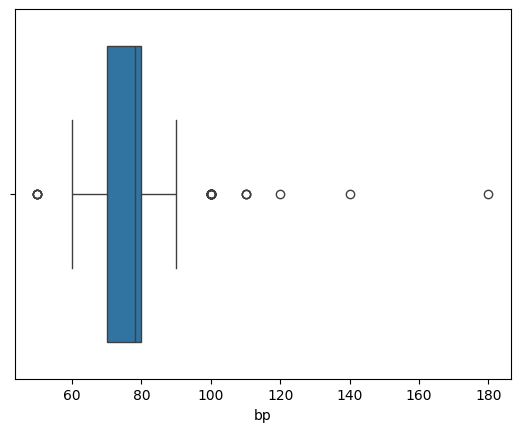

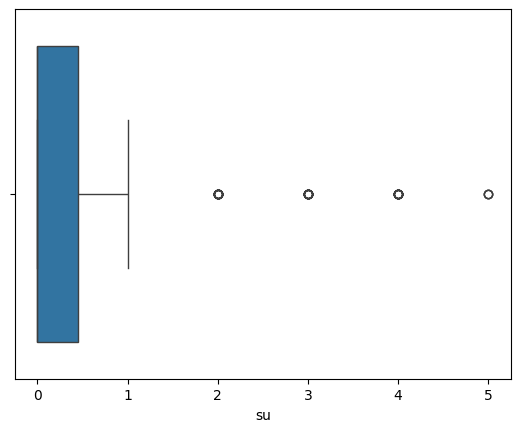

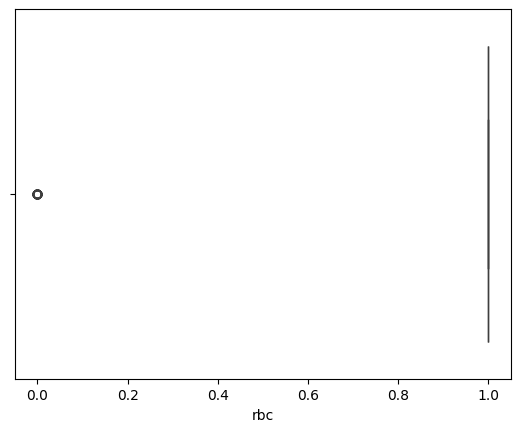

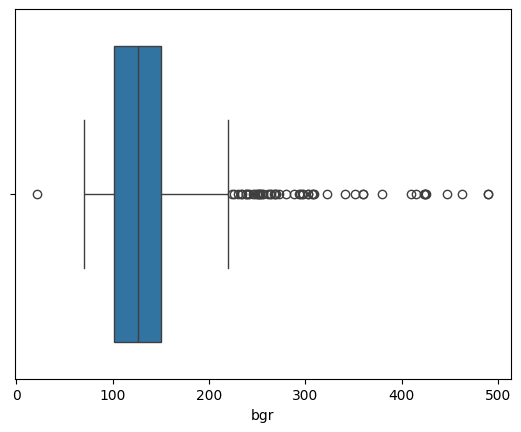

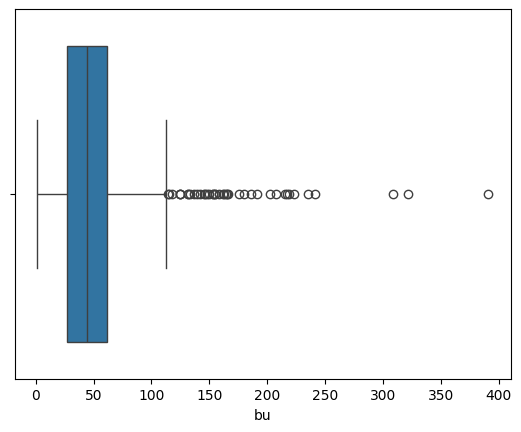

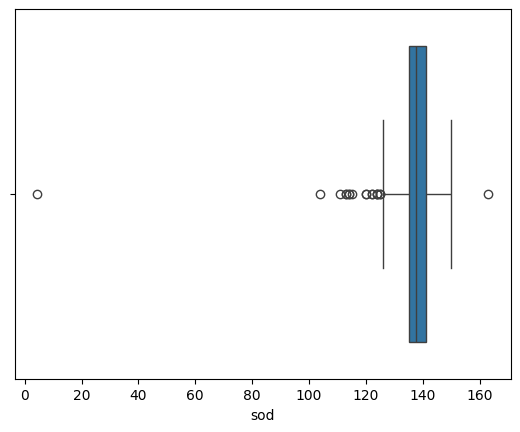

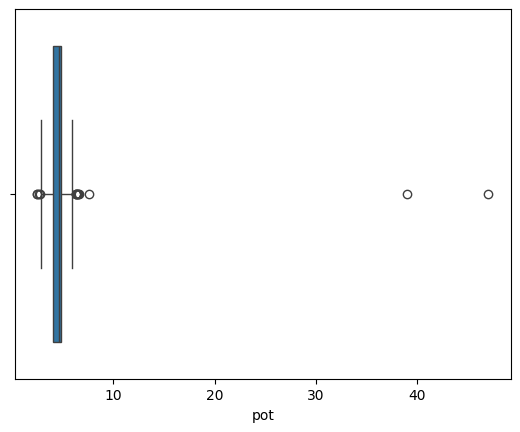

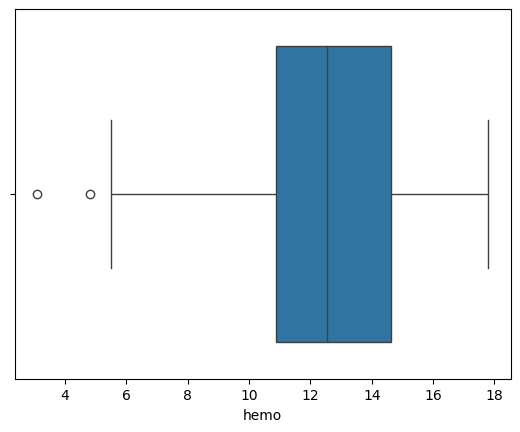

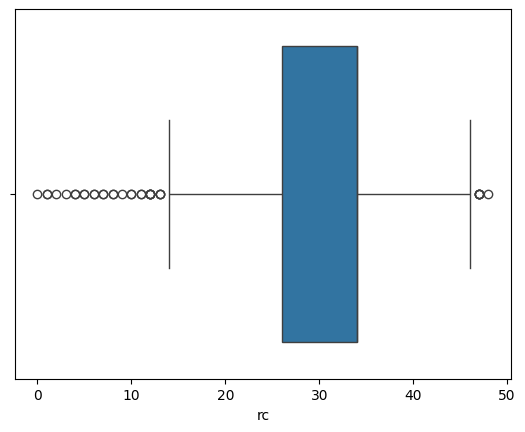

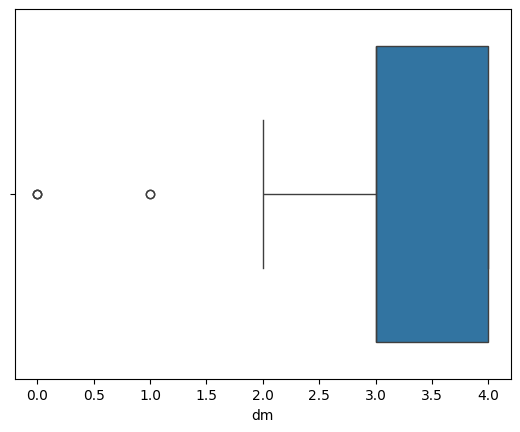

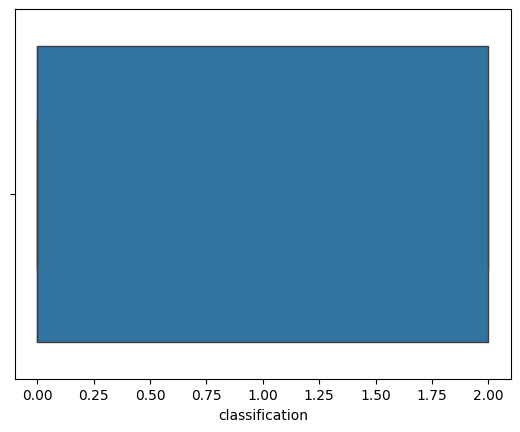

In [185]:
def fun(col):
  sns.boxplot(x=col,data=df)
  plt.show()
for i in df.columns:
  fun(i)

In [186]:
IQR=df['age'].quantile(0.75)-df['age'].quantile(0.25)
lowerbound=df['age'].quantile(0.25)-(1.5*IQR)
upperbound=df['age'].quantile(0.75)+(1.5*IQR)
df['age']=np.where(df['age']>upperbound,upperbound,df['age'])
df['age']=np.where(df['age']<lowerbound,lowerbound,df['age'])

In [187]:
IQR=df['bp'].quantile(0.75)-df['bp'].quantile(0.25)
lowerbound=df['bp'].quantile(0.25)-(1.5*IQR)
upperbound=df['bp'].quantile(0.75)+(1.5*IQR)
df['bp']=np.where(df['bp']>upperbound,upperbound,df['bp'])
df['bp']=np.where(df['bp']<lowerbound,lowerbound,df['bp'])

In [188]:
IQR=df['su'].quantile(0.75)-df['bp'].quantile(0.25)
lowerbound=df['su'].quantile(0.25)-(1.5*IQR)
upperbound=df['bp'].quantile(0.75)+(1.5*IQR)
df['su']=np.where(df['su']>upperbound,upperbound,df['su'])
df['su']=np.where(df['su']<lowerbound,lowerbound,df['su'])

In [189]:
IQR=df['rbc'].quantile(0.75)-df['rbc'].quantile(0.25)
lowerbound=df['rbc'].quantile(0.25)-(1.5*IQR)
upperbound=df['rbc'].quantile(0.75)+(1.5*IQR)
df['rbc']=np.where(df['rbc']>upperbound,upperbound,df['rbc'])
df['rbc']=np.where(df['rbc']<lowerbound,lowerbound,df['rbc'])

In [190]:
IQR=df['bgr'].quantile(0.75)-df['bgr'].quantile(0.25)
lowerbound=df['bgr'].quantile(0.25)-(1.5*IQR)
upperbound=df['bgr'].quantile(0.75)+(1.5*IQR)
df['bgr']=np.where(df['bgr']>upperbound,upperbound,df['bgr'])
df['bgr']=np.where(df['bgr']<lowerbound,lowerbound,df['bgr'])

In [191]:
IQR=df['bu'].quantile(0.75)-df['bu'].quantile(0.25)
lowerbound=df['bu'].quantile(0.25)-(1.5*IQR)
upperbound=df['bu'].quantile(0.75)+(1.5*IQR)
df['bu']=np.where(df['bu']>upperbound,upperbound,df['bu'])
df['bu']=np.where(df['bu']<lowerbound,lowerbound,df['bu'])

In [192]:
IQR=df['sod'].quantile(0.75)-df['sod'].quantile(0.25)
lowerbound=df['sod'].quantile(0.25)-(1.5*IQR)
upperbound=df['sod'].quantile(0.75)+(1.5*IQR)
df['sod']=np.where(df['sod']>upperbound,upperbound,df['sod'])
df['sod']=np.where(df['sod']<lowerbound,lowerbound,df['sod'])

In [193]:
IQR=df['pot'].quantile(0.75)-df['pot'].quantile(0.25)
lowerbound=df['pot'].quantile(0.25)-(1.5*IQR)
upperbound=df['pot'].quantile(0.75)+(1.5*IQR)
df['pot']=np.where(df['pot']>upperbound,upperbound,df['pot'])
df['pot']=np.where(df['pot']<lowerbound,lowerbound,df['pot'])

In [194]:
IQR=df['hemo'].quantile(0.75)-df['hemo'].quantile(0.25)
lowerbound=df['hemo'].quantile(0.25)-(1.5*IQR)
upperbound=df['hemo'].quantile(0.75)+(1.5*IQR)
df['hemo']=np.where(df['hemo']>upperbound,upperbound,df['hemo'])
df['hemo']=np.where(df['hemo']<lowerbound,lowerbound,df['hemo'])

In [195]:
IQR=df['rc'].quantile(0.75)-df['rc'].quantile(0.25)
lowerbound=df['rc'].quantile(0.25)-(1.5*IQR)
upperbound=df['rc'].quantile(0.75)+(1.5*IQR)
df['rc']=np.where(df['rc']>upperbound,upperbound,df['rc'])
df['rc']=np.where(df['rc']<lowerbound,lowerbound,df['rc'])

In [196]:
IQR=df['dm'].quantile(0.75)-df['dm'].quantile(0.25)
lowerbound=df['dm'].quantile(0.25)-(1.5*IQR)
upperbound=df['dm'].quantile(0.75)+(1.5*IQR)
df['dm']=np.where(df['dm']>upperbound,upperbound,df['dm'])
df['dm']=np.where(df['dm']<lowerbound,lowerbound,df['dm'])

# Separating data

In [197]:
x=df.drop(columns=["classification"])
y=df["classification"]

# StandardScaler

In [198]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [199]:
scaler=preprocessing.StandardScaler()

In [200]:
x_tarin=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# LogisticRegression

In [201]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
lr_accuracy=accuracy_score(y_test,lr_pred)
print(lr_accuracy)

0.8625


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [207]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred=lr.predict(x_test)
dt_accuracy=accuracy_score(y_test,dt_pred)
print(dt_accuracy)

0.8625


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [208]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=lr.predict(x_test)
knn_accuracy=accuracy_score(y_test,knn_pred)
print(knn_accuracy)

0.8625


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [209]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred=lr.predict(x_test)
rf_accuracy=accuracy_score(y_test,rf_pred)
print(rf_accuracy)

0.8625


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [202]:
df.head(2)

,age,bp,su,rbc,bgr,bu,sod,pot,hemo,rc,dm,classification
0,48.0,80.0,104.324786,1.0,121.000000,36.0,137.528754,4.627244,15.4,34.0,4.0,0
1,9.0,55.0,104.324786,1.0,148.036517,18.0,137.528754,4.627244,11.3,34.0,3.0,0


# Testing

In [221]:
dt.predict([[48.0,80.0,104.324786,1.0,121.000000,36.0,137.528754,4.627244,15.4,34.0,4.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [222]:
dt.predict([[55.0,80.0,104.324786,1.0,140.0,49.0,150.0,4.9,15.7,30.0,3.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

In [223]:
dt.predict([[48.0,80.0,104.32,1.0,121.00,36.0,137.52,4.62,15.4,34.0,4.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [224]:
dt.predict([[55.0,80.0,104.32,1.0,140.0,49.0,150.0,4.9,15.7,30.0,3.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

# save the model

In [231]:
import pickle
filename="ckd.pkl"
pickle.dump(dt,open(filename,"wb"))